## POE5 Chapter 5 Codes

### POE5 Example 5.1 Data for Hamberger Chain

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(font_scale=1.3)

df = pd.read_excel('andy.xlsx')

In [2]:
df.head()

,sales,price,advert
0,73.2,5.69,1.3
1,71.8,6.49,2.9
2,62.4,5.63,0.8
3,67.4,6.22,0.7
4,89.3,5.02,1.5


In [3]:
df.price.describe()

count    75.000000
mean      5.687200
std       0.518432
min       4.830000
25%       5.220000
50%       5.690000
75%       6.210000
max       6.490000
Name: price, dtype: float64

In [4]:
df.price.var()

0.2687717837837837

In [5]:
df.price.skew()

0.06311511207705003

In [6]:
df.price.kurtosis()

-1.3416823560008861

**NOTE:** This kurtosis value does not agree with STATA Manual, but I checked on Excel and that gives the result -1.341682, so likely Stata manual is wrong.

In [7]:
df[0:5]  # or can use df.head()

,sales,price,advert
0,73.2,5.69,1.3
1,71.8,6.49,2.9
2,62.4,5.63,0.8
3,67.4,6.22,0.7
4,89.3,5.02,1.5


In [8]:
df[-3:]

,sales,price,advert
72,75.4,5.71,0.7
73,81.3,5.45,2.0
74,75.0,6.05,2.2


In [9]:
df.tail()  # shows last 5 lines

,sales,price,advert
70,82.2,5.73,1.7
71,74.2,5.11,0.7
72,75.4,5.71,0.7
73,81.3,5.45,2.0
74,75.0,6.05,2.2


In [10]:
df.tail(3)  # to show last 3 lines

,sales,price,advert
72,75.4,5.71,0.7
73,81.3,5.45,2.0
74,75.0,6.05,2.2


### Now doing the regression

In [11]:
df['const'] = 1.

reg = sm.OLS(endog=df['sales'],exog=df[['const','price','advert']])
res = reg.fit()

print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.433   
Dependent Variable: sales            AIC:                453.7390
Date:               2020-08-06 13:37 BIC:                460.6915
No. Observations:   75               Log-Likelihood:     -223.87 
Df Model:           2                F-statistic:        29.25   
Df Residuals:       72               Prob (F-statistic): 5.04e-10
R-squared:          0.448            Scale:              23.874  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      118.9136    6.3516  18.7217  0.0000  106.2519  131.5754
price       -7.9079    1.0960  -7.2152  0.0000  -10.0927   -5.7230
advert       1.8626    0.6832   2.7263  0.0080    0.5007    3.2245
-----------------------------------------------------------------
Omnibus:             

### POE5 Example 5.2 (continued)

In [12]:
beta0 = res.params.const
beta1 = res.params.price
beta2 = res.params.advert

In [13]:
def predicted(price,advert):
    return beta0 + beta1*price + beta2*advert

price = 5.50
advert = 1.2

print(f"Predicted sales = ${predicted(price,advert)*1000:.2f}")

Predicted sales = $77655.51


### Carter uses 'lincom' in Stata manual.  Not sure how to do that in Python

An alternative to the above is to use the predict method.

In [14]:
yhat = res.predict(exog=np.array([1,5.5,1.2]))
print(f"Predicted sales = ${yhat[0]*1000:.2f}")

Predicted sales = $77655.51


With this approach, yhat is an array with one element, so we have to use the "[0]" to let the parser know we want just that element of the array.  Alternatively, we can add a comma (,) as shown below, and then we're telling the system that we just want that first element stored into the variable yhat.  You can use whichever approach feels cleaner to you.  (need to clean this up for the textbook) 

In [15]:
yhat, = res.predict(exog=np.array([1,5.5,1.2]))
print(f"Predicted sales = ${yhat*1000:.2f}")

Predicted sales = $77655.51


**Rescaling the variables**

POE5 Example 5.2 (continued)

What if we change the units of measurement for the variables of the model such that PRICE is measured in cents and SALES in dollars?

In [16]:
df['sales2'] = df.sales*1000
df['price2'] = df.price*100

reg2 = sm.OLS(endog=df['sales2'],exog=df[['const','price2','advert']])
res2 = reg2.fit()

print(res2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.433     
Dependent Variable: sales2           AIC:                1489.9023 
Date:               2020-08-06 13:37 BIC:                1496.8548 
No. Observations:   75               Log-Likelihood:     -741.95   
Df Model:           2                F-statistic:        29.25     
Df Residuals:       72               Prob (F-statistic): 5.04e-10  
R-squared:          0.448            Scale:              2.3874e+07
-------------------------------------------------------------------
          Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const  118913.6104 6351.6375 18.7217 0.0000 106251.8524 131575.3684
price2    -79.0785   10.9599 -7.2152 0.0000   -100.9268    -57.2303
advert   1862.5843  683.1955  2.7263 0.0080    500.6590   3224.5096
------------------------------------------------------------------

### 5.2.4 Estimating the Error Variance

**POE5 Example 5.3 Error Variance Estimate for Hamburger Chain Data**

To esimate the equation's error variance, use the equation

$$
\hat\sigma^2 = \frac{\sum_{i = 1}^{N} \hat e_i^2}{N-K}
$$

This value is stored in the 'res' object as res.scale


In [17]:
print(res.scale,np.sqrt(res.scale))

23.874207456853224 4.886123970679952


We could also calculate it via the equation if we wanted.  The sum in the numerator of equation N is stored in res.ssr, and the DOF of the model (N-K) is stored in res.df_resid, so

In [18]:
sighat_squared = res.ssr / res.df_resid

In [19]:
print(sighat_squared,np.sqrt(sighat_squared))

23.874207456853224 4.886123970679952


### 5.2.5 Measuring Goodness-of-Fit

**POE5 Example 5.4 $R^2$ for Hamburger Chain Data**

Decompose the total sum of square od fhte dependent variable (SST) into the explained (SSR) and unexplained (SSE) variation
$$
SST = SSR + SSE
$$
Then goodness-of-fit is 
$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$
The value of $R^2$ as estimated from the model is stored as res.rsquared.

In [20]:
print(res.rsquared)

0.4482577622149434


The adjusted $R^2$ is stored in res.rsquared_adj

In [21]:
print(res.rsquared_adj)

0.4329315889431363


### 5.2.6 Frisch-Waugh-Lovel

In [22]:
reg = sm.OLS(endog=df['sales'],exog=df[['const','price']])
res_sales = reg.fit()
df['sales_resid'] = df.sales - res_sales.predict()

reg = sm.OLS(endog=df['advert'],exog=df[['const','price']])
res_advert = reg.fit()
df['advert_resid'] = df.advert - res_advert.predict()

reg = sm.OLS(endog=df['sales_resid'],exog=df[['advert_resid']])
res = reg.fit()

print(res.summary2())

                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.081   
Dependent Variable:     sales_resid      AIC:                         449.7390
Date:                   2020-08-06 13:37 BIC:                         452.0565
No. Observations:       75               Log-Likelihood:              -223.87 
Df Model:               1                F-statistic:                 7.639   
Df Residuals:           74               Prob (F-statistic):          0.00720 
R-squared (uncentered): 0.094            Scale:                       23.229  
----------------------------------------------------------------------------------
                   Coef.      Std.Err.       t        P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
advert_resid       1.8626       0.6739     2.7639     0.0072     0.5198     3.2054
------------------------------------------------------------

In [23]:
# Redoing the OLS here to get results in 'res' again.  Might want to 
# clean up the intermediate stuff so we don't have to do this ?

reg = sm.OLS(endog=df['sales'],exog=df[['const','price','advert']])
res = reg.fit()

print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.433   
Dependent Variable: sales            AIC:                453.7390
Date:               2020-08-06 13:37 BIC:                460.6915
No. Observations:   75               Log-Likelihood:     -223.87 
Df Model:           2                F-statistic:        29.25   
Df Residuals:       72               Prob (F-statistic): 5.04e-10
R-squared:          0.448            Scale:              23.874  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      118.9136    6.3516  18.7217  0.0000  106.2519  131.5754
price       -7.9079    1.0960  -7.2152  0.0000  -10.0927   -5.7230
advert       1.8626    0.6832   2.7263  0.0080    0.5007    3.2245
-----------------------------------------------------------------
Omnibus:             

### 5.3 Least Squares Precision

The covariance matrix is available via the method res.cov_params().  This returns a pandas dataframe object.

$$
{\rm cov}(b_0,b_1,b_2) = 
\begin{bmatrix}
{\rm var}(b_0) & {\rm cov}(b_0,b_1) & {\rm cov}(b_0,b_2) \\
{\rm cov}(b_0,b_1) & {\rm var}(b_1) & {\rm cov}(b_1,b_2) \\
{\rm cov}(b_0,b_2) & {\rm cov}(b_1,b_2) & {\rm var}(b_2)
\end{bmatrix}
$$

In [24]:
cov_matrix = res.cov_params()
print(cov_matrix)

            const     price    advert
const   40.343299 -6.795064 -0.748421
price   -6.795064  1.201201 -0.019742
advert  -0.748421 -0.019742  0.466756


So the estimated variance of $b_1$ (*price*) is 1.20 and its estimated covariance with $b_2$ (*advert*) is -0.0197.

If we take the square roots of the diagonal elements we obtain the least squares standard errors.  We can use NumPy's `.diag` method as follows.  Comparing with the output table above confirms these are the reported standard errors.


In [25]:
print(np.sqrt(np.diag(cov_matrix)))

[6.35163751 1.09599302 0.68319547]


We can also get these individually:

In [26]:
print(np.sqrt(cov_matrix.const.const))
print(np.sqrt(cov_matrix.price.price))
print(np.sqrt(cov_matrix.advert.advert))

6.351637506245157
1.095993022061845
0.683195473785013


But the standard errors of the diagonal elements are available to us in `res.bse`.  The `b` in `bse` is a historical artifact from the linear model y = X b + u.  It would cause less confusion if this object was instead named `params_se` in parallel with `params`, but `bse` it is for the forseeable future.

In [27]:
print(res.bse)

const     6.351638
price     1.095993
advert    0.683195
dtype: float64


And if we just want the standard error of the price, we can call `res.bse.price`

In [28]:
print(res.bse.price)

1.095993022061845


### 5.4 Confidence Intervals

**POE5 Example 5.6 Interval Estimates for Coefficients in Hamburger Sales Equation**

Lots of description of what we're doing...



Note that the 95% CI is given as part of the summary output.

Other CIs are avialable via the `.conf_int()` method:


In [29]:
print(res.conf_int(alpha=0.05))



                 0           1
const   106.251852  131.575368
price   -10.092676   -5.723032
advert    0.500659    3.224510


In [30]:
print(res.conf_int(alpha=0.01)) # 99% CI

                 0           1
const   102.108118  135.719103
price   -10.807690   -5.008019
advert    0.054950    3.670218


If we want to print the summary table with a different CI that 95%, we can do that.  Here we also show that we can change the title of the table, which might be useful if we are cutting/pasting into a journal article.


In [31]:
print(res.summary2(alpha=0.1,title="My Title"))

                            My Title
Model:              OLS              Adj. R-squared:     0.433   
Dependent Variable: sales            AIC:                453.7390
Date:               2020-08-06 13:37 BIC:                460.6915
No. Observations:   75               Log-Likelihood:     -223.87 
Df Model:           2                F-statistic:        29.25   
Df Residuals:       72               Prob (F-statistic): 5.04e-10
R-squared:          0.448            Scale:              23.874  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.05     0.95]  
------------------------------------------------------------------
const      118.9136    6.3516  18.7217  0.0000  108.3299  129.4973
price       -7.9079    1.0960  -7.2152  0.0000   -9.7341   -6.0816
advert       1.8626    0.6832   2.7263  0.0080    0.7242    3.0010
-----------------------------------------------------------------
Omnibus:               0.535     

And if we are only interested in the 99% CI for the `advert` column, we can specify that as follows

In [32]:
# Haven't figured this out yet - moving on!

**This section above may need more cells, but I'm moving on for now.**

### 5.4.2 Linear Combination of Parameters

**POE5 Example 5.7 Interval Estimate for a Change in Sales**

Do this later when I have internet


### 5.6 Hypothesis Tests

**POE5 Example 5.8 Testing the Significance of Price**

The $t$-ratio test that $\beta_1 = 0$ against the two-sided alternative that $\beta_1\ne0$ is
$$
t = \frac{b_2 - 0}{se(b_2)}\sim t_{(N-K)}
$$
The fit parameters $b_i$ are obtained via the method `.params` and then
The value for $b_2$ is stored in `.price` (clean up the language)

In [33]:
t1 = res.params.price/res.bse.price
print(t1)

-7.215241491451143


This is also available directly, via (and might just want to include only this and not the cells above)

In [34]:
print(res.tvalues.price)

-7.215241491451143


The $p$-values are available via res.pvalues

In [35]:
print(res.pvalues.price)

4.4239972874347194e-10


In [36]:
from scipy.stats import t

c1 = t.ppf(0.975,res.df_resid)
print(c1)

1.9934635662785827


The null hypothesis is rejected if $|t| > c1$.

**POE5 Example 5.9 Testing the Significance of Advertising Expenditure**

The two-sided test that $beta_2 = 0$ is similar to above


In [37]:
t2 = res.tvalues.advert
p2 = res.pvalues.advert
c2 = t.ppf(0.975,res.df_resid)
print(f"t2 = {t2:.4f}\np2 = {p2:.3e}\nc2 = {c2:.4f}")

t2 = 2.7263
p2 = 8.038e-03
c2 = 1.9935


Statsmodels.OLS includes the calculations of these two-tailed tests of significance when a regression is calculated **(insert image capture from summary2() or just point back to that figure).**

### 5.5.2 One-Sided $t$-test

**POE5 Example 5.10 Testing for Elastic Demand**

To test the null hypythesis that $\beta_1\ge0$ agains the alternative $\beta_1<0$, we use the same statistic as above for $t$, but the critical value is now in the left tail of the $t$-distribution  **Asli check Stata manual p 218 where 'scalar crit = -invttail...'  I think the '-' should not be there.** ??


In [38]:
t1 = res.tvalues.price
crit = t.ppf(0.05,res.df_resid)
pval = 1-t.sf(t1,res.df_resid)

print(f"t1   = {t1:7.4f}\ncrit = {crit:7.4f}\npval = {pval:10.3e}")

t1   = -7.2152
crit = -1.6663
pval =  2.212e-10


**POE5 Example 5.11 Testing Advertising Effectiveness**

The test of advertising effectiveness is to compare the null hypothesis $\beta_2\le1$ against the alternative $\beta_2>1$.  Because of this, we cannot simply use `res.tvalues.advert` but must do the calculation as follows:

In [39]:
t2 = (res.params.advert-1)/res.bse.advert

crit = t.ppf(0.05,res.df_resid)
pval = t.sf(t2,res.df_resid)

print(f"t2   = {t2:7.4f}\ncrit = {crit:7.4f}\npval = {pval:7.4f}")

t2   =  1.2626
crit = -1.6663
pval =  0.1054


### 5.5.3 Testing a Linear Combination

**POE5 Example 5.12 Testing the Effect of Changes in Price and Advertising**

(copied)Big Andy’s marketing adviser claims that dropping the price by 20 cents will be more effective for
increasing sales revenue than increasing advertising expenditure by $500. In terms of the model,
she thinks that −0.2 β2 > 0.5β3. The null hypothesis is that 2 3 −0.2 β − 0.5β ≤ 0 and the alternative
is 2 3 −0.2 β − 0.5β > 0

**Now that I have this figured out, it will be explained up above where we first talk about `lincom` stuff from Stata manual**

        In order to test a linear combination using Statsmodels.OLS, we make use of the method `res.t_test(r)` which requires that we have an array `r` that specifies the linear restrictions. It is assumed that the linear combination is equal to zero.  In our case, we want to model $-0.2\beta_1 - 0.5\beta_2\le 0$, so we have `r = [0, -0.2, -0.5]`.

In [40]:
r = [0, -0.2, -0.5]
t_test = res.t_test(r)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6503      0.401      1.622      0.109      -0.149       1.450


Dividing the estimated coefficient, 0.6503, by the standard error, 0.401, yields the $t$-ratio of 1.62.  Again here we suggest putting this example into Spyder IDE, where you can double click in the Variable Explorer pane to view all of the information available to you.

The one-sided $p$-value is half of the two-sided one, provided the esimated linear combination has the anticipated sign.  We can calculate this as follows **(Note this has some funkyness, so we might just want to say p value is half the one-sided one)**

In [41]:
crit = t.ppf(0.05,res.df_resid)
pval = t.sf(t_test.statistic,res.df_resid)
print(t1,crit,pval)

-7.215241491451143 -1.6662936960297965 [[0.05461891]]


## 5.6 Interaction Variables

### 5.6.1 Polynomial Regressors

**POE5 Example 5.14 Extending the Model for Burger Barn Sales**

We can explore non-linearity in the relationships between independent and dependent variables by making use of polynomials of the regressors in the model.  For example in our Burger Barn example, we would expect that the marginal return of \\$1000 of advertising expenditures would decrease as the net expenditure increased.  We can explore this with the model

$$
SALES = \beta_0 + \beta_1PRICE + \beta_2ADVERT + \beta_3ADVERT**2 + e
$$

We can accomplish easily by defining a new column for our pandas DataFrame, and calling Statsmodels.OLS with our new variable included.


In [42]:
df['a2'] = df.advert**2

reg = sm.OLS(endog=df['sales'],exog=df[['const','price','advert','a2']])
res = reg.fit()

print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.487   
Dependent Variable: sales            AIC:                447.1080
Date:               2020-08-06 13:37 BIC:                456.3780
No. Observations:   75               Log-Likelihood:     -219.55 
Df Model:           3                F-statistic:        24.46   
Df Residuals:       71               Prob (F-statistic): 5.60e-11
R-squared:          0.508            Scale:              21.579  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const       109.7190    6.7990  16.1374  0.0000  96.1621  123.2759
price        -7.6400    1.0459  -7.3044  0.0000  -9.7255   -5.5545
advert       12.1512    3.5562   3.4170  0.0011   5.0604   19.2420
a2           -2.7680    0.9406  -2.9427  0.0044  -4.6435   -0.8924
--------------------

The new variable `df.a2` is an example of an *interaction variable*.  

When the variables interact, the marginal effect of another (\\$1000) unit of advertising of advertising on sales is a function of the amount spent on advertising.  To determine this effect, we take the partial derivative of the average sales with respect to advertising to obtain

$$\frac{\partial E(SALES)}{\partial ADVERT} = \beta_2 + 2\beta_3 ADVERT
$$

In the example in the textbook the situation is evaluated at two points, namely $ADVERT=0.5$ and $ADVERT=2.0$.  The python code for this is

In [43]:
me1 = res.params.advert + 2*0.5*res.params.a2
me2 = res.params.advert + 2*2.0*res.params.a2

print(f"me1 = {me1:.3f}\nme2 = {me2:.3f}")

me1 = 9.383
me2 = 1.079


We could of course write a quick function to calculate this

In [44]:
def me(advert):
    return res.params.advert + 2*advert*res.params.a2

print(f"me1 = {me(0.5):.3f}\nme2 = {me(2.0):.3f}")

me1 = 9.383
me2 = 1.079


### Using Factor Variables for Interactions

Here Carter is using the built in 'margins' command in Stata, and factor variables.  This will be completely different in python/pandas/statsmodels.

I don't see how to do this as an existing 'package' within Python ecosystem.  I just checked Gretl manual, and it's not in there, so although I wrote to Carter to ask, I think we don't do it!


### 5.6.3 Interactions with Other Variables

**POE5 Example 5.15 An Interaction Variable in a Wage Equation**

$$
WAGE = \beta_0 + \beta_1 EDUC + \beta_2 EXPER + \beta_3(EDUC\times EXPER) + e
$$



Marginal effect of experience if educ =  8: 0.216
Marginal effect of experience if educ = 16: 0.194
Marginal effect of experience if educ = 20: 0.183


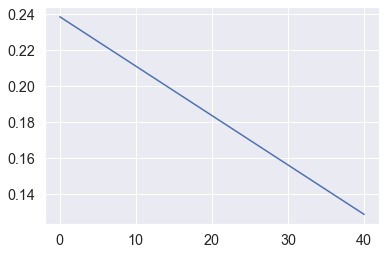

In [45]:
df_cps = pd.read_excel('cps5_small.xlsx')

df_cps['educ_exper'] = df_cps.educ*df_cps.exper

df_cps['const'] = 1.

res_cps = sm.OLS(endog=df_cps['wage'],exog=df_cps[['const','educ','exper','educ_exper']]).fit()

def me(years):
    return res_cps.params.exper + res_cps.params.educ_exper*years

print(f"Marginal effect of experience if educ =  8: {me(8):.3f}")
print(f"Marginal effect of experience if educ = 16: {me(16):.3f}")
print(f"Marginal effect of experience if educ = 20: {me(20):.3f}")

yrs = np.linspace(0,40,200)
plt.plot(yrs,me(yrs))

### Log-wages and quadratic interactions

**POE5 Example 5.16 A Log-Quadratic Wage Equation**

$$\ln(WAGE) = \beta_0 + \beta_1 EDUC + \beta_2 EXPER + \beta_3(EDUC\times EXPER) + \beta_4 EXPER^2 + e
$$

In [46]:
df_cps['lwage'] = np.log(df_cps.wage)
df_cps['exper2'] = df_cps.exper*df_cps.exper

res_cps = sm.OLS(endog=df_cps['lwage'],
             exog=df_cps[['const','educ','exper','educ_exper','exper2']]).fit()

print(res_cps.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.319    
Dependent Variable: lwage            AIC:                1567.8798
Date:               2020-08-06 13:37 BIC:                1593.3301
No. Observations:   1200             Log-Likelihood:     -778.94  
Df Model:           4                F-statistic:        141.4    
Df Residuals:       1195             Prob (F-statistic): 5.29e-99 
R-squared:          0.321            Scale:              0.21535  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.6792    0.1561   4.3503  0.0000   0.3729   0.9855
educ            0.1359    0.0101  13.5128  0.0000   0.1162   0.1557
exper           0.0489    0.0068   7.1452  0.0000   0.0355   0.0623
educ_exper     -0.0013    0.0003  -3.7045  0.0002  -0.0019  -0.0006
exper2

The marginal effects are:
$$
\frac{\partial E[\ln(wage)|EDUC,EXPER]}{\partial EXPER}= \beta_2 + \beta_3 EDUC + 2\beta_4 EXPER
$$
and
$$
\frac{\partial E[\ln(wage)|EDUC,EXPER)]}{\partial EDUC} = \beta_1 + \beta_3 EXPER
$$
These can be computed as above with function definitions.  Note how the name of the resulting fit parameters are represented in the `res` (results) object.

Here we convert our equation into code, and we consider the four cases possible given by: years of education (`yrs_edu`) being either 8 or 16 years, and years of experience (`yrs_exp`) being 0 or 20.

In this next cell, we calculate and print the marginal effect of an additional year of experience on wages, 

In [47]:
def me_exp(yrs_edu,yrs_exp):
    return res_cps.params.exper + res_cps.params.educ_exper * yrs_edu +\
              2*res_cps.params.exper2*yrs_exp

def me_edu(yrs_edu,yrs_exp):
    return res_cps.params.educ + res_cps.params.educ_exper*yrs_exp

yrs_edu =[8, 8, 16, 16]
yrs_exp = [0, 20, 0, 20]

for i in range(len(yrs_edu)):
    print(f"me_exp(wage|{yrs_edu[i]:.1f},{yrs_exp[i]:.1f}) =  \
          {me_exp(yrs_edu[i],yrs_exp[i]):.7f}")




me_exp(wage|8.0,0.0) =            0.0387521
me_exp(wage|8.0,20.0) =            0.0197894
me_exp(wage|16.0,0.0) =            0.0286081
me_exp(wage|16.0,20.0) =            0.0096454


Next we calculate the marginal effect of an addional year of education.  

In [48]:
for i in range(len(yrs_edu)):
    print(f"me_edu(wage|{yrs_edu[i]:.1f},{yrs_exp[i]:.1f}) =  \
          {me_edu(yrs_edu[i],yrs_exp[i]):.7f}")

me_edu(wage|8.0,0.0) =            0.1359463
me_edu(wage|8.0,20.0) =            0.1105864
me_edu(wage|16.0,0.0) =            0.1359463
me_edu(wage|16.0,20.0) =            0.1105864


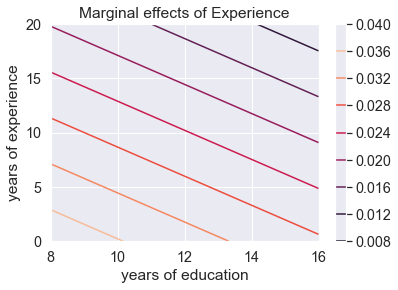

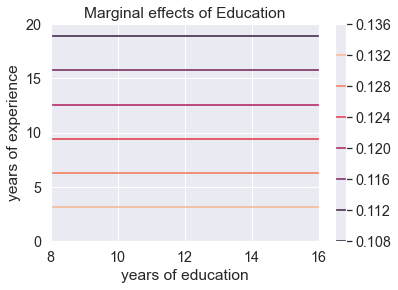

In [49]:
yrs_edu = np.linspace(8,16,200)
yrs_exp = np.linspace(0,20,200)

X, Y = np.meshgrid(yrs_edu,yrs_exp)

plt.contour(X,Y,me_exp(X,Y))
plt.xlabel("years of education")
plt.ylabel("years of experience")
plt.title("Marginal effects of Experience")
plt.colorbar()
plt.show()
plt.contour(X,Y,me_edu(X,Y))
plt.xlabel("years of education")
plt.ylabel("years of experience")
plt.title("Marginal effects of Education")
plt.colorbar()

### 5.6.5 Optimal Levl of Advertising

**POE Example 5.17 The Optimal Level of Advertising**

Equations

$$
\beta2 + 2*\beta_3 ADVERT = 1
$$

$$ ADVERT_0 = \frac{1-\beta2}{2\beta_3} $$
We still have our original DataFrame `df` containing our data for Andy's, but let's run the fit again since we've since used `res`.

In [50]:
res = sm.OLS(endog=df['sales'],exog=df[['const','price','advert','a2']]).fit()

advert_opt = (1-res.params.advert) /  (2*res.params.a2)

print(f"Optimal level of advertising = {advert_opt:.3f}")

Optimal level of advertising = 2.014


Asli: Gretl manual indicates how to calculate the error on this.  See how much of that you want to include.  I can do the latex for the equations if you like, although easy enough once you know \partial give $\partial$

In [51]:
advert_opt = (1-res.params.advert) /  (2*res.params.a2)

d3 = -1/(2*res.params.a2)
d4 = -1*(1-res.params.advert)/(2*res.params.a2**2)

d = np.array([0, 0, d3, d4])
cov = res.cov_params()
se = np.sqrt(np.dot(np.dot(d,cov),d.T))
tc975 = t.ppf(0.975,res.df_resid)  # critical value

lb = advert_opt - tc975*se  # Lower bound 95% CI
ub = advert_opt + tc975*se  # Upper bound 95% CI


print(f"Optimal level of advertising = {advert_opt*1000:.2f}")
print(f"The 95% confidence interval is ({lb*1000:.2f},{ub*1000:.2f})")

Optimal level of advertising = 2014.34
The 95% confidence interval is (1757.67,2271.01)


### 5.6.6 Maximizing waves via experience

**POE5 Example 5.18 How Much Experience Maximizes Wages?**

Here again we use

$$\ln(WAGE) = \beta_0 + \beta_1 EDUC + \beta_2 EXPER + \beta_3(EDUC\times EXPER) + \beta_4 EXPER^2 + e
$$

We found the marginal effect of another year of experience to be

$$
\frac{\partial E[\ln(wage)|EDUC,EXPER]}{\partial EXPER}= \beta_2 + \beta_3 EDUC + 2\beta_4 EXPER
$$

The point at which this reaches a maximum is when the marginal effect becomes zero:

$$ \beta_2 + \beta_3 EDUC + 2\beta_4 EXPER_0 = 0$$

Solving for $EXPER_0$,

$$ EXPER_0 = \frac{-\beta_2-\beta_3 EDUC}{2\beta_4}$$

We ran cells above and still have our results in `res_cps` so do not need to re-run the regression.

Assuming 16 years current education, we have:

In [52]:
yrs_edu = 16

exper0 = (-res_cps.params.exper - res_cps.params.educ_exper*yrs_edu)/ \
          (2*res_cps.params.exper2)
          
print(f"exper0 = {exper0:.4f}")

d2 = -1/(2*res_cps.params.exper2)
d3 = -yrs_edu / (2*res_cps.params.exper2)
d4 = (res_cps.params.exper + yrs_edu*res_cps.params.educ_exper) \
       / (2*res_cps.params.exper2**2)
       
d = np.array([0,0,d2,d3,d4])

cov = res_cps.cov_params()
se = np.sqrt(np.dot(np.dot(d,cov),d.T))

tc975 = t.ppf(0.975,res_cps.df_resid)  # critical value

lb = exper0 - tc975*se  # Lower bound 95% CI
ub = exper0 + tc975*se  # Upper bound 95% CI

print(f"The 95% confidence interval is ({lb:.4f},{ub:.4f})")

exper0 = 30.1730
The 95% confidence interval is (26.6619,33.6841)


## See gretl manual for discussion of above

## Appendix 5B.1 Nonlinear functions of a single parameter

**POE5 Example 5.19 An Interval Estimate for $\exp(\beta_1/10)$**

In [53]:
df = pd.read_excel('mc20.xlsx')

df['const'] = 1

res = sm.OLS(endog=df['y'],exog=df[['const','x']]).fit()

g1hat = np.exp(res.params.x/10)

print(f"g1hat = {g1hat:.4f}")


seg1 = res.bse.x*(np.exp(res.params.x/10)/10)

tc975 = t.ppf(0.975,res.df_resid)  # critical value

lb = g1hat - tc975*seg1  # Lower bound 95% CI
ub = g1hat + tc975*seg1  # Upper bound 95% CI

print(f"The 95% confidence interval is ({lb:.4f},{ub:.4f})")

g1hat = 2.9109
The 95% confidence interval is (1.6006,4.2212)


## Appendix 5B.2 Nonlinear Functions of Two Parameters

**POE5 Example 5.20: An Interval Estimate for $\beta_0/\beta_1$**

In [54]:
df = pd.read_excel('mc20.xlsx')

df['const'] = 1

res = sm.OLS(endog=df['y'],exog=df[['const','x']]).fit()

g2hat = res.params.const/res.params.x

print(f"g2hat = {g2hat:.4f}")

d1 = 1/res.params.x
d2 = -res.params.const/res.params.x**2

d = np.array((d1,d2))
cov = res.cov_params()
se = np.sqrt(np.dot(np.dot(d,cov),d.T))


tc975 = t.ppf(0.975,res.df_resid)  # critical value

lb = g2hat - tc975*se  # Lower bound 95% CI
ub = g2hat + tc975*se  # Upper bound 95% CI

print(f"The 95% confidence interval is ({lb:.4f},{ub:.4f})")

g2hat = 8.1841
The 95% confidence interval is (-1.8077,18.1758)


## Appendix 5.C1 Least Square Estimation with chi-square errors

In [55]:
import numpy as np
import pandas as pd
from numpy.random import seed, chisquare
import statsmodels.api as sm
from scipy.stats import t

seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
nu = 4
tc975 = t.ppf(0.975,nobs-2)

intcp     = []  # list of best-fit beta0
intcp_err = []  # best-fit beta0 err
slope     = []  # best-fit beta1
slope_err = []  # best-fit beta1 err
ub = []         # CI upper bound
lb = []         # CI lower bound
tstat = []      # t statistic
sigma2 = []

df = pd.DataFrame(columns=['x','y','const'])
df.x = 20*[10] + 20*[20]  # first 20 elements are '10', second 20 are '20'
y0 = beta1 + beta2*df.x
df.const = 1

for i in range(nsamples):
    e = sigma*(chisquare(nu,len(y0))-nu)/np.sqrt(2*nu)
    df.y = y0 + e
    reg = sm.OLS(endog=df['y'],exog=df[['const','x']])
    results = reg.fit()

    slope.append(results.params.x)
    slope_err.append(results.bse.x)
    intcp.append(results.params.const)
    intcp_err.append(results.bse.const)
    ub.append(slope[-1]+tc975*slope_err[-1])
    lb.append(slope[-1]-tc975*slope_err[-1])
    tstat.append((slope[-1]-beta2)/slope_err[-1])
    sigma2.append(results.ssr/results.df_resid)

columns = ['b1r','b1r_sig','b2r','b2r_sig','tstat','sig2r']
data = np.array([slope,slope_err,intcp,intcp_err,tstat,sigma2]).T
df_res = pd.DataFrame(data,columns=columns)

tstat = np.array(tstat)  # convert to arrays for ease of handling
lb = np.array(lb)
ub = np.array(ub)

reject = tstat > t.ppf(0.95,nobs-2)  # logical array ([False, True, ...])
cover = (lb < beta2) & (ub > beta2)  # logical array
close = ((lb<9) & (11<ub))

n_rejected = sum(reject)/nsamples    # sum() returns number of "True" elements in reject
n_kept = sum(cover)/nsamples
n_close = sum(close)/nsamples


print(f"Percent rejected = {n_rejected*100:.3f}")
print(f"Percent kept.    = {n_kept*100:.3f}")
print(f"Percent close    = {n_close*100:.3f}")

print(df_res.describe(percentiles=None))

Percent rejected = 4.930
Percent kept.    = 94.910
Percent close    = 81.640
                b1r       b1r_sig           b2r       b2r_sig         tstat  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       9.996061      1.559521    100.119116     24.658195     -0.001706   
std        1.594013      0.269359     25.176358      4.258941      1.033053   
min        3.862064      0.806449      1.980095     12.751080     -3.812077   
25%        8.946777      1.367678     82.811069     21.624890     -0.686008   
50%        9.997820      1.535191     99.345183     24.273496     -0.001647   
75%       11.052567      1.724177    116.240701     27.261632      0.687768   
max       16.732540      2.911992    209.237189     46.042639      4.121699   

              sig2r  
count  10000.000000  
mean    2504.653403  
std      885.217477  
min      650.360130  
25%     1870.543423  
50%     2356.810423  
75%     2972.786217  
max     8479.698258  


## Appendix 5C.2 Monte Carlo Simulation of the Delta Method

Asli: Do check that I have everything here - I'm not 100% certain.

In [68]:
import numpy as np
import pandas as pd
from numpy.random import seed, chisquare
import statsmodels.api as sm
from scipy.stats import t

seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
nu = 4
tc975 = t.ppf(0.975,nobs-2)
tc950 = t.ppf(0.950,nobs-2)

b0 = []
b1 = []
se_b1 = []
g1 = []
se_g1 = []
p_g1 = []
g2 = []
se_g2 = []
p1_g2 = []
p2_g2 = []
close = []

df = pd.DataFrame(columns=['x','y','const'])
df.x = 20*[10] + 20*[20]  # first 20 elements are '10', second 20 are '20'
y0 = beta1 + beta2*df.x
df.const = 1

for i in range(nsamples):
    e = sigma*(chisquare(nu,len(y0))-nu)/np.sqrt(2*nu)
    df.y = y0 + e
    res = sm.OLS(endog=df['y'],exog=df[['const','x']]).fit()
    # coefficients
    b0.append(res.params.const)
    b1.append(res.params.x)
    se_b1.append(res.bse.x)
    # first function
    g1.append(np.exp(res.params.x/10))
    se_g1.append(res.bse.x*(np.exp(res.params.x/10)/10))
    p_g1.append(np.abs((g1[-1]-np.exp(1))/se_g1[-1])>tc975)
    # second function
    g2.append(res.params.const/res.params.x)          
    d1 = 1/res.params.x
    d2 = -res.params.const/res.params.x**2 
    d = np.array((d1,d2))
    cov = res.cov_params()
    se_g2.append(np.sqrt(np.dot(np.dot(d,cov),d.T)))
    c2l = g2[-1] - tc975*se_g2[-1]
    c2r = g2[-1] + tc975*se_g2[-1]
    p1_g2.append((10>c2l) & (10<c2r))
    p2_g2.append(((res.params.x-10)/res.bse.x)>tc950)
    close.append((9>c2l) & (11<c2r))
    
print("variable     mean    std. dev")
print(f"    g1    {np.mean(g1):8.4f}    {np.std(g1):.4f}")
print(f" se_g1    {np.mean(se_g1):8.4f}    {np.std(se_g1):.4f}")
print(f"    g2    {np.mean(g2):8.4f}    {np.std(g2):.4f}")
print(f" se_g1    {np.mean(se_g2):8.4f}    {np.std(se_g2):.4f}")
print(f"  p_g1    {np.mean(p_g1):8.4f}    {np.std(p_g1):.4f}")
print(f" p1_g1    {np.mean(p1_g2):8.4f}    {np.std(p1_g2):.4f}")
print(f" p2_g2    {np.mean(p2_g2):8.4f}    {np.std(p2_g2):.4f}")
print(f" close    {np.mean(close):8.4f}    {np.std(close):.4f}")

variable     mean    std. dev
    g1      2.7519    0.4412
 se_g1      0.4293    0.1040
    g2     10.7207    4.6895
 se_g1      4.3642    2.0619
  p_g1      0.0545    0.2270
 p1_g1      0.9436    0.2307
 p2_g2      0.0493    0.2165
 close      0.9055    0.2925


Gretl manual includes runs with n=200 and n=1000 which is easy enough to do if you want.

Plots shown below with normailzed pdfs.  Compare with Stata manual.  

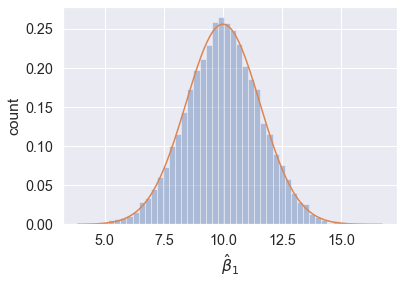

In [72]:
import seaborn as sns
from scipy import stats

sns.set(font_scale=1.3)

fig, ax = plt.subplots()

sns.distplot(b1,kde=False,norm_hist=True)
ax.set_xlabel(r"$\hat\beta_1$")
ax.set_ylabel("count")

x0 = np.linspace(min(b1),max(b1),100)
plt.plot(x0, stats.norm.pdf(x0, beta2, np.mean(se_b1)))

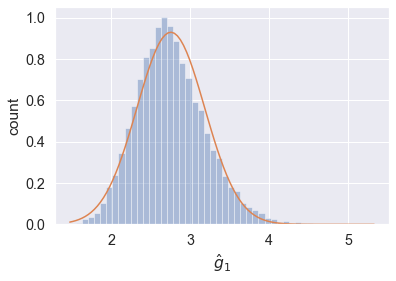

In [74]:
fig, ax = plt.subplots()
sns.distplot(g1,kde=False,norm_hist=True)
ax.set_xlabel(r"$\hat g_1$")
ax.set_ylabel("count")

x0 = np.linspace(min(g1),max(g1),100)
plt.plot(x0, stats.norm.pdf(x0, np.mean(g1), np.mean(se_g1)))

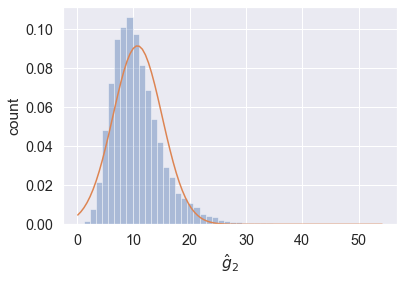

In [75]:
fig, ax = plt.subplots()
sns.distplot(g2,kde=False,norm_hist=True)
ax.set_xlabel(r"$\hat g_2$")
ax.set_ylabel("count")

x0 = np.linspace(min(g2),max(g2),100)
plt.plot(x0, stats.norm.pdf(x0, np.mean(g2), np.mean(se_g2)))

## Appendix 5D Bootstrapping

$$ 
\exp(b_2/10)\pm\left\{{1.96\times{\rm se}[\exp(b_2/10)]}\right\}
$$

**I have basically no idea what this is talking about - so we'll have to do this when you catch up and can explain it to me**
